# 🌸 Arbre de Décision sur le Dataset Iris (sklearn)
Ce notebook montre différentes techniques d'apprentissage supervisé avec des arbres de décision sur le célèbre dataset Iris.

In [1]:
# 📦 Importation des bibliothèques
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# 🌼 Chargement du dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy (Gini): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



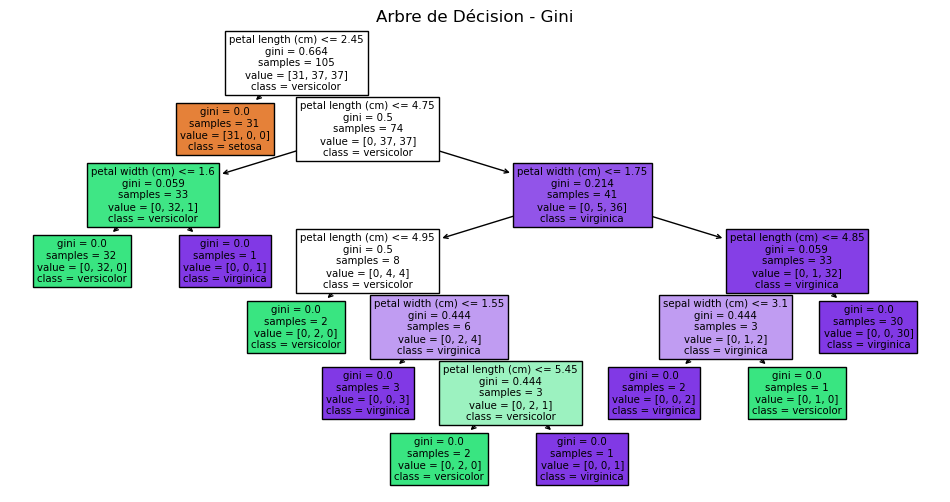

In [24]:
# 🌳 Arbre de Décision avec critère Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(12,6))
plot_tree(clf_gini, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Arbre de Décision - Gini")
plt.show()

Accuracy (Entropie): 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



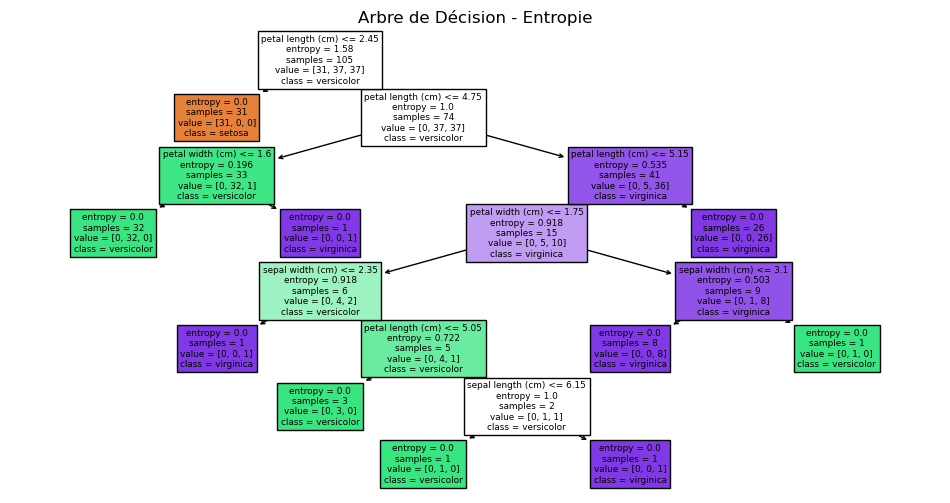

In [26]:
# 🌳 Arbre de Décision avec critère Entropie (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropie):", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(12,6))
plot_tree(clf_entropy, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Arbre de Décision - Entropie")
plt.show()

Meilleurs paramètres trouvés : {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
Accuracy (GridSearchCV): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



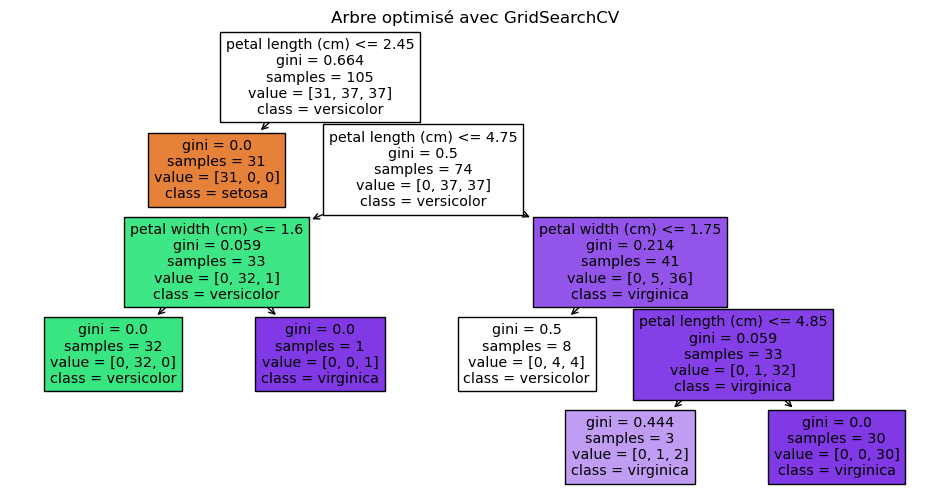

In [28]:
# 🔍 Pré-élagage avec GridSearchCV (recherche des meilleurs paramètres)
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
y_pred_grid = grid_search.predict(X_test)
print("Accuracy (GridSearchCV):", accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
plt.figure(figsize=(12,6))
plot_tree(grid_search.best_estimator_, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Arbre optimisé avec GridSearchCV")
plt.show()


Accuracy (manuel): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



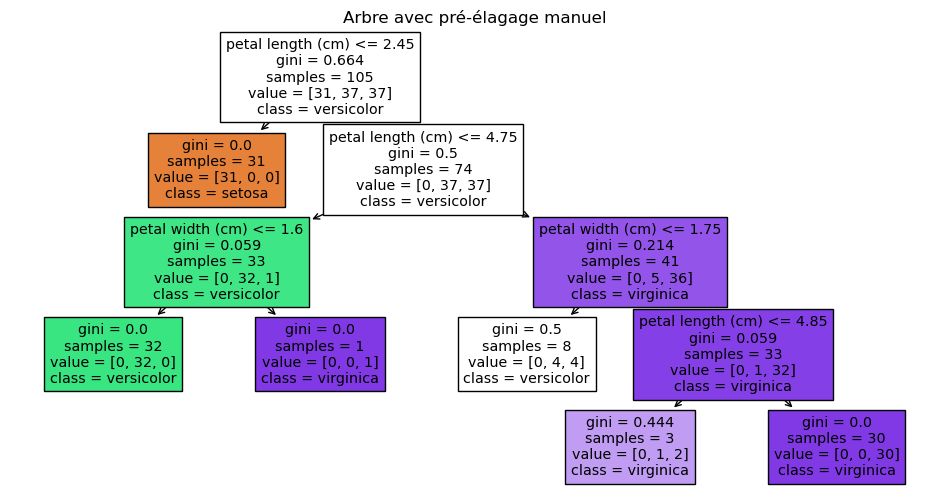

In [40]:
# ✂️ Pré-élagage manuel (max_depth=3, min_samples_split=4)
clf_manual = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split= 10, random_state=42)
clf_manual.fit(X_train, y_train)
y_pred_manual = clf_manual.predict(X_test)
print("Accuracy (manuel):", accuracy_score(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))
plt.figure(figsize=(12,6))
plot_tree(clf_manual, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Arbre avec pré-élagage manuel")
plt.show()

Accuracy (manuel): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



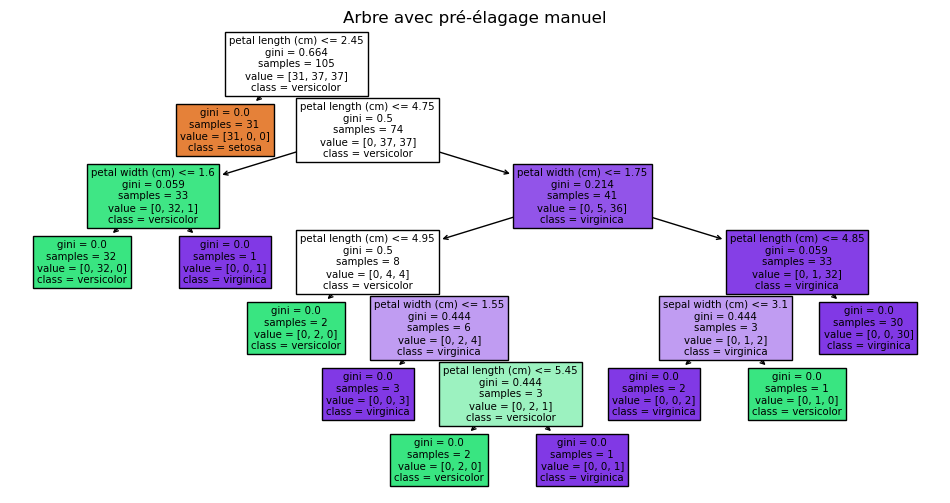

In [50]:
# ✂️ Pré-élagage manuel (max_depth=3, min_samples_split=4)
clf_manual = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split= 2, random_state=42)
clf_manual.fit(X_train, y_train)
y_pred_manual = clf_manual.predict(X_test)
print("Accuracy (manuel):", accuracy_score(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))
plt.figure(figsize=(12,6))
plot_tree(clf_manual, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Arbre avec pré-élagage manuel")
plt.show()

Valeurs de ccp_alpha disponibles: [0.         0.00923521 0.01269841 0.01269841 0.01847042 0.02705804
 0.25028684 0.31210884]


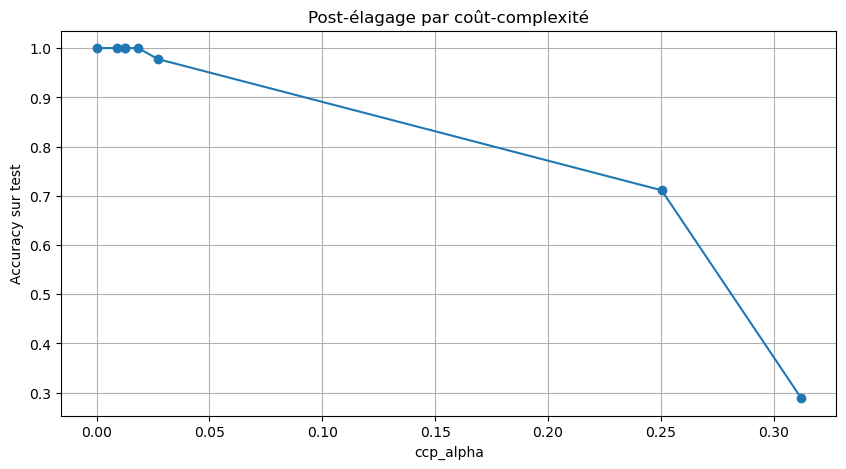

In [54]:
# 🔧 Post-élagage avec cost-complexity pruning (ccp_alpha)
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("Valeurs de ccp_alpha disponibles:", ccp_alphas)

# On crée plusieurs modèles avec différentes valeurs de ccp_alpha
models = []
for alpha in ccp_alphas:
    m = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    m.fit(X_train, y_train)
    models.append(m)

# Évaluer la performance de chaque modèle
test_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models]
plt.figure(figsize=(10,5))
plt.plot(ccp_alphas, test_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy sur test")
plt.title("Post-élagage par coût-complexité")
plt.grid(True)
plt.show()

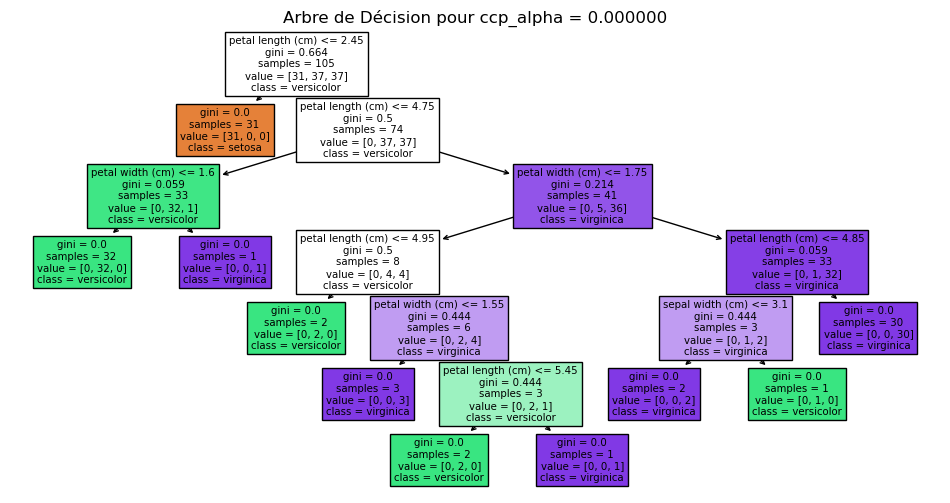

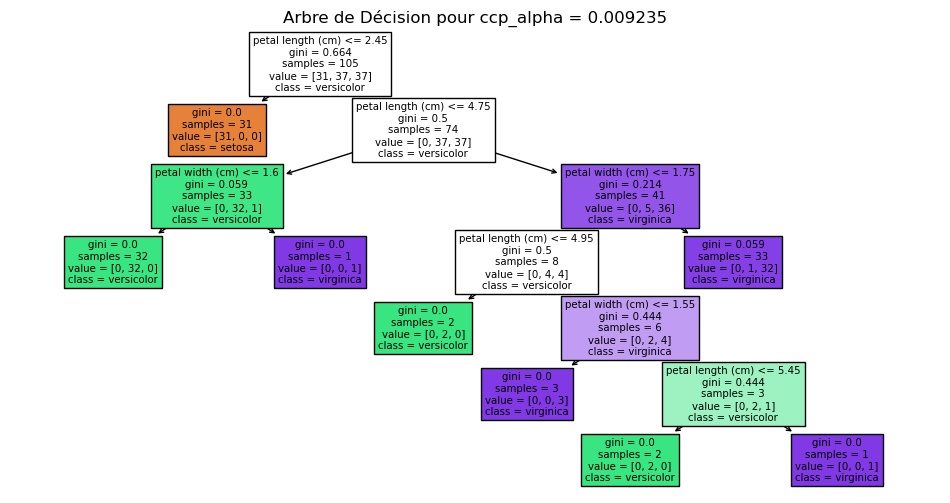

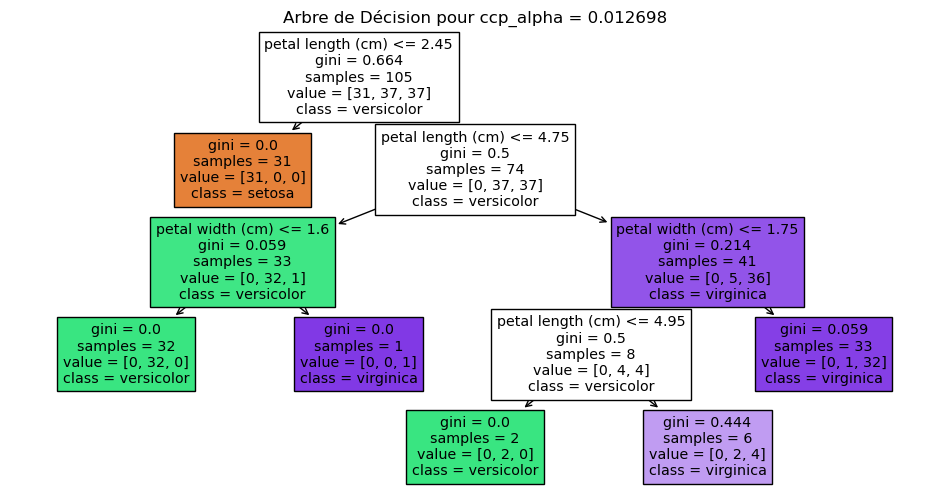

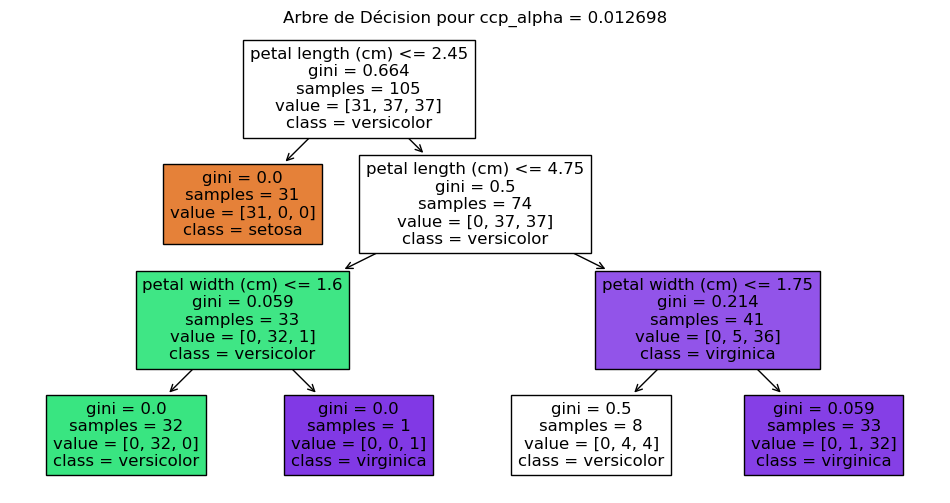

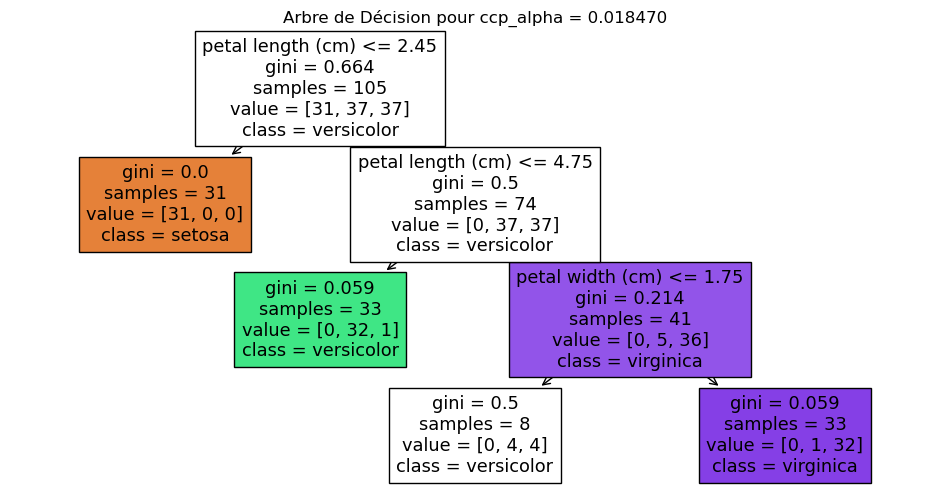

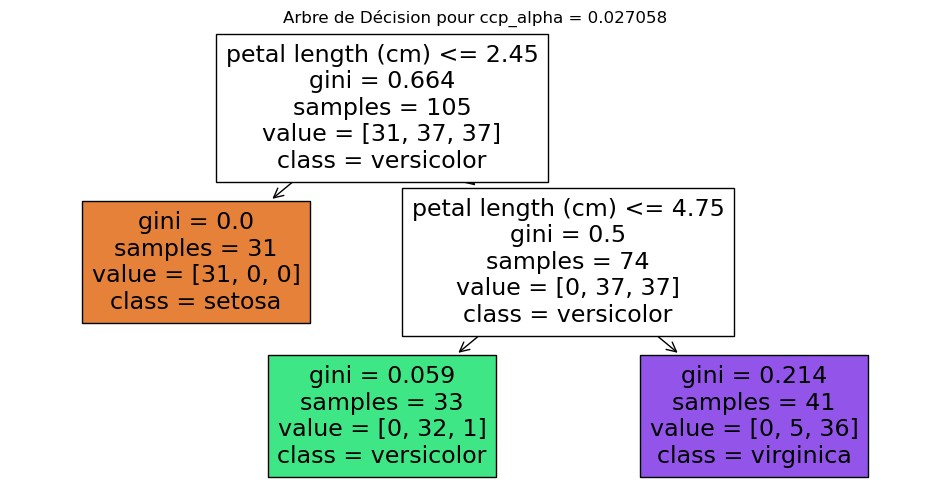

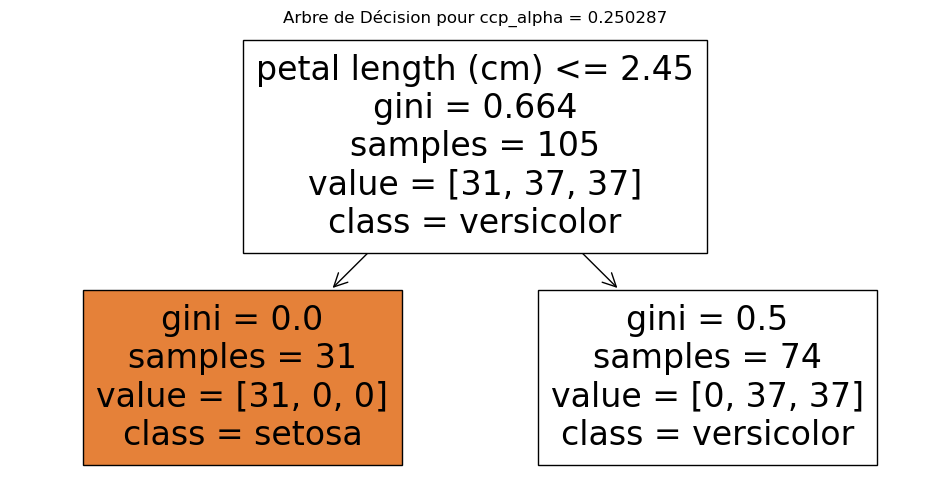

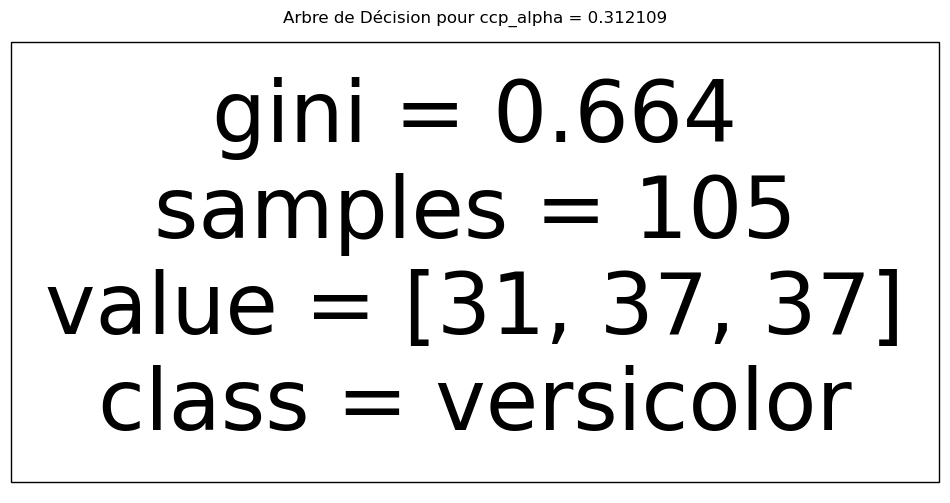

In [56]:
# Apprentissage initial pour obtenir le chemin de pruning
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Récupérer les valeurs de ccp_alpha
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Entraîner un modèle pour chaque alpha
models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)

# Afficher les arbres pour chaque ccp_alpha
for i, (alpha, model) in enumerate(zip(ccp_alphas, models)):
    plt.figure(figsize=(12, 6))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f"Arbre de Décision pour ccp_alpha = {alpha:.6f}")
    plt.show()


In [58]:
# Calculer et afficher l'accuracy + classification report pour chaque modèle associé à chaque ccp_alpha
from sklearn.metrics import classification_report

for i, (alpha, model) in enumerate(zip(ccp_alphas, models)):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== ccp_alpha = {alpha:.6f} ===")
    print(f"Accuracy : {acc:.4f}")
    print("Classification Report :")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("-" * 50)


=== ccp_alpha = 0.000000 ===
Accuracy : 1.0000
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------
=== ccp_alpha = 0.009235 ===
Accuracy : 1.0000
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

---------------------------------------------

C:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\skle